In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Simple Linear Regression

In [2]:
df = pd.read_csv("salary.csv")
df.head()

,Experience(in years),Salary
0,0.5,7500
1,0.5,7550
2,0.6,7700
3,0.6,7900
4,0.7,8500


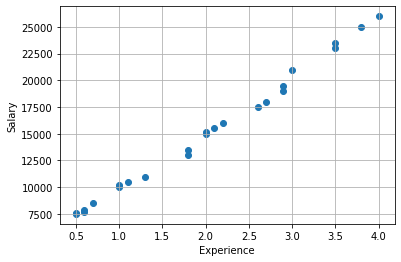

In [4]:
plt.scatter(df["Experience(in years)"],df["Salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.grid()
plt.show()

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)

(24, 1)
(24,)


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(X , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

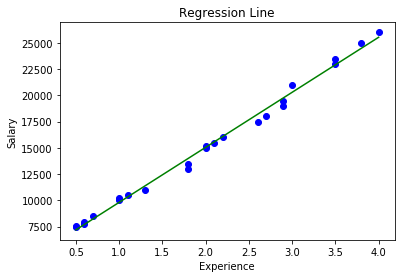

In [10]:
plt.scatter(X, y, color = 'b')
plt.plot(X, model.predict(X), color = 'g')
plt.title('Regression Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [13]:
model.score(X , y)

0.9937170282250509

In [18]:
#y = b + w*x : weight(coefficient) and bias(intercept)

print("y = {} + {} * x".format(model.intercept_ , model.coef_[0]))

y = 4564.093682517139 + 5239.329555500804 * x


# Multi Linear Regression

In [42]:
dp = pd.read_csv("housing.csv")
dp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
dp = pd.concat([dp , pd.get_dummies(dp['ocean_proximity'],drop_first=True)],axis=1)
dp = dp.drop (['ocean_proximity'],axis=1)
dp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [44]:
#function to remove all records having null values.
dp.dropna(inplace=True)

In [45]:
X = dp.drop(["median_house_value" ,"latitude" , "longitude"] , axis = 1)
y = dp['median_house_value']

print(X.columns)

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')


In [46]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 2 , test_size = 0.20)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16346, 10)
(16346,)
(4087, 10)
(4087,)


In [47]:
ss = StandardScaler()
train = ss.fit_transform(X_train)

train.shape

(16346, 10)

In [52]:
from sklearn.linear_model import LinearRegression

m_model = LinearRegression()

m_model.fit(train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#accuracy at training 

m_model.score(train , y_train)

0.6373544441179599

In [56]:
test = ss.fit_transform(X_test)

test.shape

(4087, 10)

In [58]:
#accuracy at testing

m_model.score(test , y_test)

0.6216450436170347